# 4. Handwritten classification using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 49s 4us/step


In [3]:
# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the ANN model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Convert 28x28 image into a
    keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 units and
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 units and
])

In [5]:
# compiling the ann model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model on the training set for 5 epochs
history=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2609 - accuracy: 0.9255 - val_loss: 0.1369 - val_accuracy: 0.9591
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1129 - accuracy: 0.9672 - val_loss: 0.0903 - val_accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0719 - val_accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0716 - val_accuracy: 0.9776


In [9]:
# Predict the labels of the test set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 591us/step


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", acc)

Confusion matrix:
[[ 970    1    1    0    0    0    4    1    3    0]
 [   0 1122    3    1    0    0    2    1    6    0]
 [   5    1  996    6    3    0    4    7    9    1]
 [   0    0    1  993    0    2    0    5    6    3]
 [   0    0    2    0  965    0    7    1    2    5]
 [   2    0    0   14    1  858    7    0   10    0]
 [   4    1    1    1    1    2  947    0    1    0]
 [   2    4    6    3    0    0    0 1004    3    6]
 [   4    0    3    4    2    0    3    3  953    2]
 [   2    5    0    6   14    2    1    9    2  968]]
Accuracy:  0.9776


## Plotting

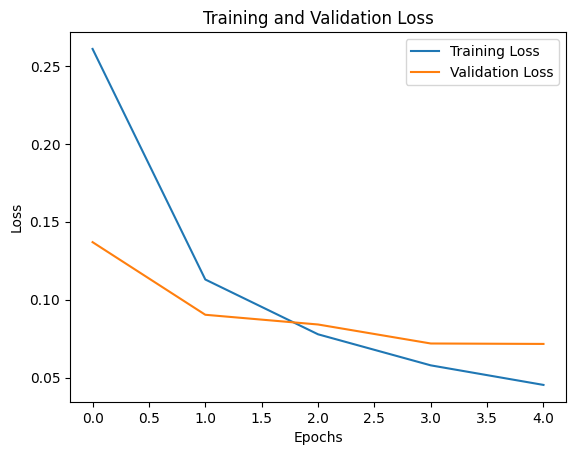

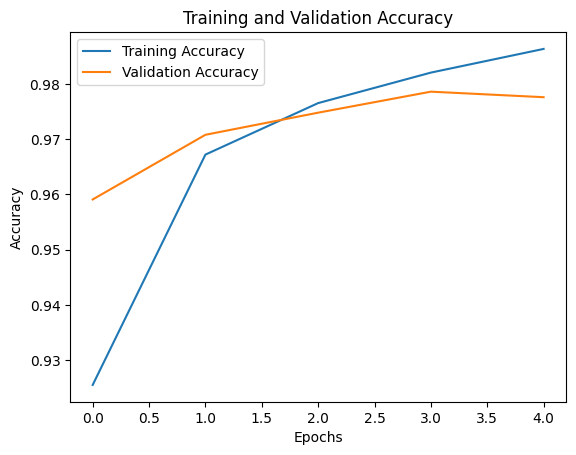

In [12]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()